# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [25]:
confirmed_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [26]:
deaths_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [27]:
recoveries_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [5]:
cols = confirmed_df.keys()                           # cols: list các cột của df
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]    # bảng các cột chứa dữ liệu từ "1/22/20" tới "8/4/21"
deaths = deaths_df.loc[:, cols[4]:cols[-1]]          # bảng các cột chứa dữ liệu từ "1/22/20" tới "8/4/21"
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]  # bảng các cột chứa dữ liệu từ "1/22/20" tới "8/4/21"
dates = confirmed.keys()                             # dates: list các tiêu đề cột từ "1/22/20" tới "8/4/21"

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])   # list thứ tự các ngày, giá trị cuối cùng là tổng số ngày

#Nhập mã lập trình của bạn tại đây:
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    mortality_rate.append(round((deaths[date].sum())/(confirmed[date].sum())*100,1))
    total_recovered.append(recoveries[date].sum())
    recovery_rate.append(round((recoveries[date].sum())/(confirmed[date].sum())*100,1))
    total_active.append(confirmed[date].sum()-deaths[date].sum()-recoveries[date].sum())
    

#cols
#confirmed
#dates
#np.array([i for i in range(len(dates))])
#list(np.array([i for i in range(len(dates))]))
#adjusted_dates

#print(total_cases[-1])
#print(total_deaths[-1])
#print(total_recovered[-1])
#print(mortality_rate)
#print(total_active[-1])
#print(recovery_rate)

In [6]:
#  The number of total cases, total deaths, total recovered, and total active until now.   # Dữ liệu cộng dồn theo ngày, nên tổng sẽ là số liệu của ngày cuối cùng
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

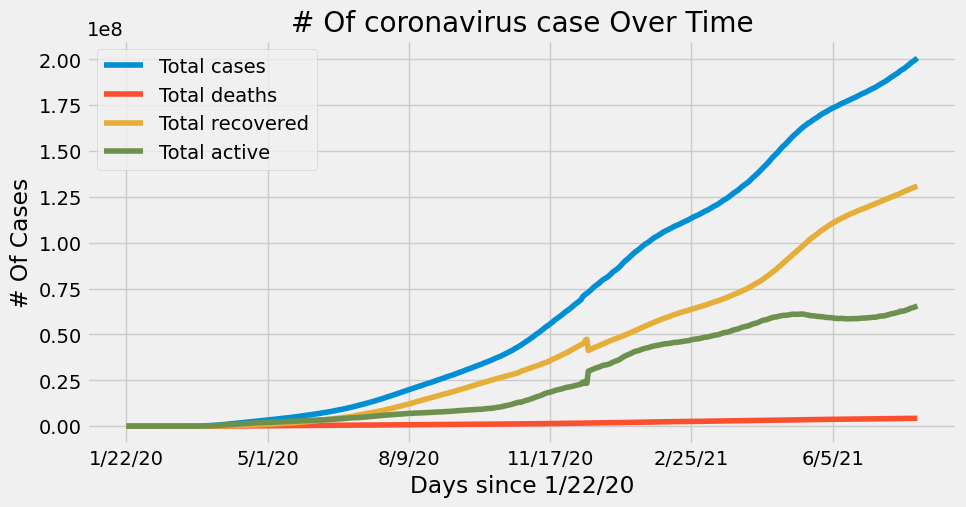

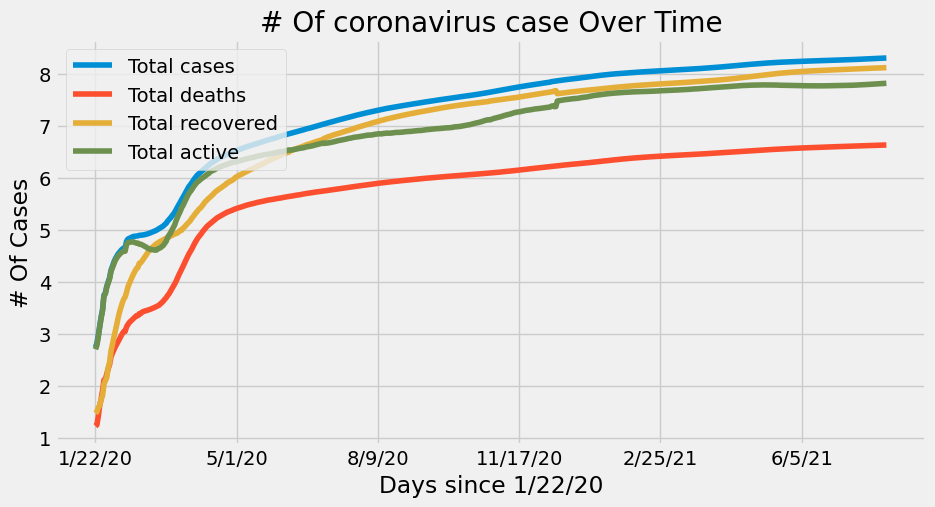

In [6]:
#Nhập mã lập trình của bạn tại đây:
dict={"Date":dates, 'Total cases':total_cases, 'Total deaths':total_deaths, 
      'Total recovered':total_recovered, 'Total active':total_active}
df=pd.DataFrame(dict)
df.set_index('Date', inplace=True)

# Biểu đồ đường cho số lượng
df.plot(kind='line', figsize=(10,5))
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('# Of Cases')
plt.show()

# Biểu đồ đường cho log(10)
import math
total_cases_log10=[]
total_deaths_log10=[]
total_recovered_log10=[]
total_active_log10=[]

for i in range(len(total_cases)):
    total_cases_log10.append(math.log10(total_cases[i]))

for i in range(len(total_deaths)):
    total_deaths_log10.append(math.log10(total_deaths[i]))

for i in range(len(total_recovered)):
    total_recovered_log10.append(math.log10(total_recovered[i]))

for i in range(len(total_active)):
    total_active_log10.append(math.log10(total_active[i]))


dict_log10={"Date":dates, 'Total cases':total_cases_log10, 'Total deaths':total_deaths_log10, 
      'Total recovered':total_recovered_log10, 'Total active':total_active_log10}
df_log10=pd.DataFrame(dict_log10)
df_log10.set_index('Date', inplace=True)
df_log10.plot(kind='line', figsize=(10,5))
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('# Of Cases')
plt.legend(loc='upper left', fontsize='medium')
plt.show()


## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

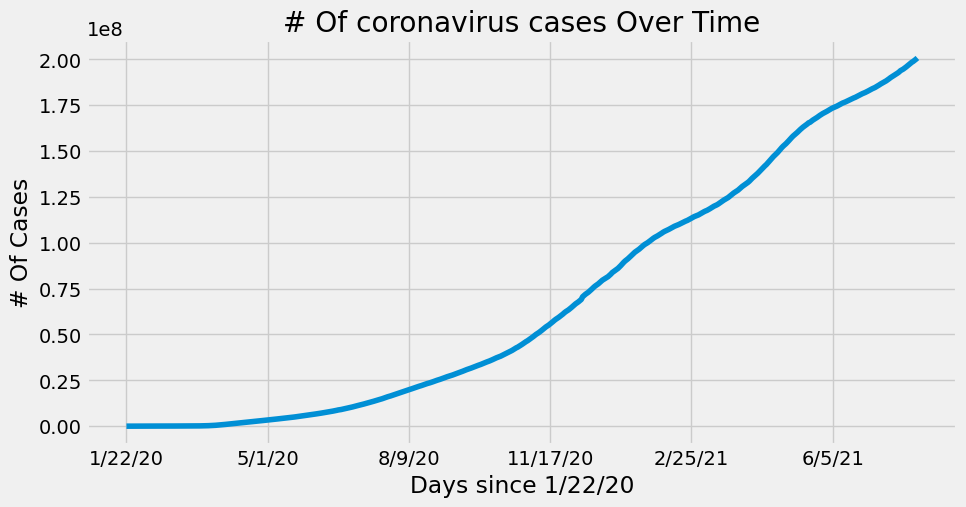

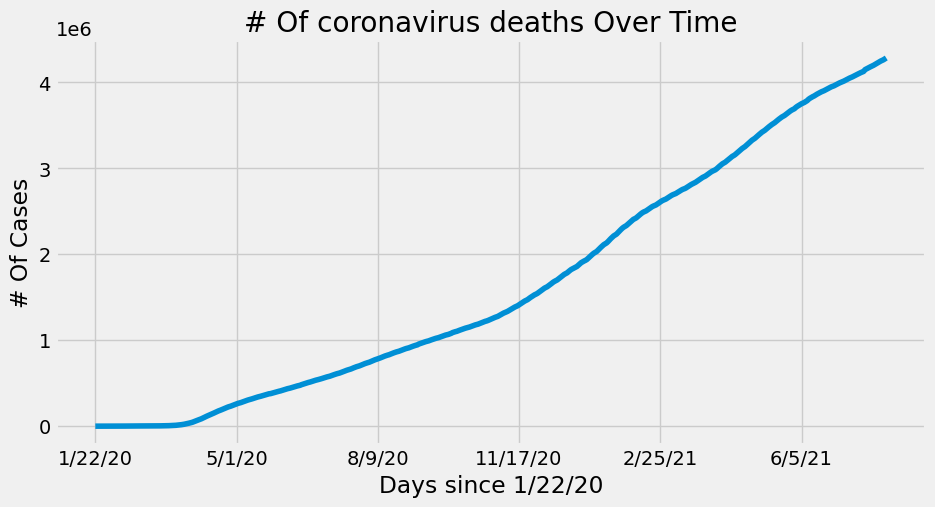

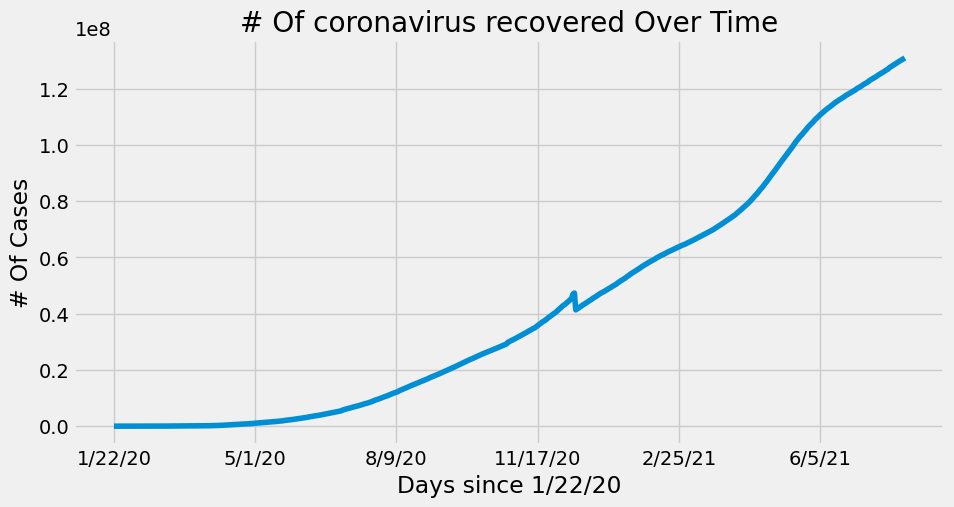

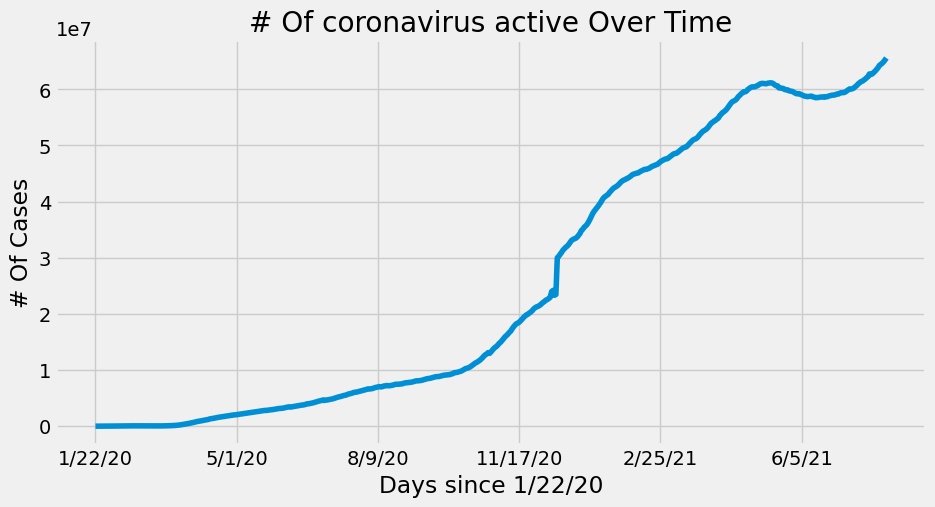

In [7]:
#Nhập mã lập trình của bạn tại đây:

# Biểu đồ Cases
df_cases=df['Total cases']
df_cases.plot(kind='line', figsize=(10,5))
plt.title('# Of coronavirus cases Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('# Of Cases')
plt.show()

# Biểu đồ Deaths
df_deaths=df['Total deaths']
df_deaths.plot(kind='line', figsize=(10,5))
plt.title('# Of coronavirus deaths Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('# Of Cases')
plt.show()

# Biểu đồ Recovered
df_recovered=df['Total recovered']
df_recovered.plot(kind='line', figsize=(10,5))
plt.title('# Of coronavirus recovered Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('# Of Cases')
plt.show()

# Biểu đồ Active
df_active=df['Total active']
df_active.plot(kind='line', figsize=(10,5))
plt.title('# Of coronavirus active Over Time')
plt.xlabel('Days since 1/22/20')
plt.ylabel('# Of Cases')
plt.show()

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [8]:
#Nhập mã lập trình của bạn tại đây:

total_cases_daily_incr=[]
total_deaths_daily_incr=[]
total_recovered_daily_incr=[]
total_active_daily_incr=[]

for i in range(len(total_cases)):
    total_cases_daily_incr.append(total_cases[i]-total_cases[i-1])
    total_cases_daily_incr[0]=0                       # Ngày đầu tiên ko thể so sánh vì ko có số liệu ngày trc đó, nên để là 0

for i in range(len(total_deaths)):
    total_deaths_daily_incr.append(total_deaths[i]-total_deaths[i-1])
    total_deaths_daily_incr[0]=0

for i in range(len(total_recovered)):
    total_recovered_daily_incr.append(total_recovered[i]-total_recovered[i-1])
    total_recovered_daily_incr[0]=0

for i in range(len(total_active)):
    total_active_daily_incr.append(total_active[i]-total_active[i-1])
    total_active_daily_incr[0]=0

print(total_cases_daily_incr)
print(total_deaths_daily_incr)
print(total_recovered_daily_incr)
print(total_active_daily_incr)


[0, 100, 287, 493, 683, 809, 2651, 589, 2068, 1690, 2111, 4749, 3100, 4012, 3745, 3162, 3594, 2731, 3031, 2609, 2043, 418, 15152, 6528, 2143, 2183, 2035, 1882, 500, 561, 630, 1762, 382, 568, 854, 972, 1344, 1424, 1871, 2379, 1980, 2612, 2344, 2740, 3984, 4137, 3798, 4295, 4759, 7476, 6756, 13194, 10888, 11233, 14567, 15174, 17561, 27087, 29530, 32427, 34212, 42555, 41883, 51481, 60814, 63931, 69582, 56516, 65011, 78442, 86357, 82448, 84210, 60121, 71715, 74726, 68938, 82176, 87181, 86422, 75515, 118581, 71832, 84633, 78256, 94468, 87880, 78252, 76322, 76482, 76087, 82038, 82717, 83563, 83205, 70795, 70984, 75832, 77328, 83652, 88946, 78262, 73997, 77637, 79685, 90422, 89138, 90483, 84343, 75223, 76141, 85280, 84348, 95642, 95902, 93890, 78363, 89132, 95818, 105423, 105973, 107342, 104150, 93216, 88223, 92362, 102556, 119993, 121436, 135043, 102860, 100264, 122641, 111216, 138230, 133406, 129330, 111012, 103048, 125982, 137162, 136186, 127474, 133908, 131947, 124912, 143899, 143202, 143

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

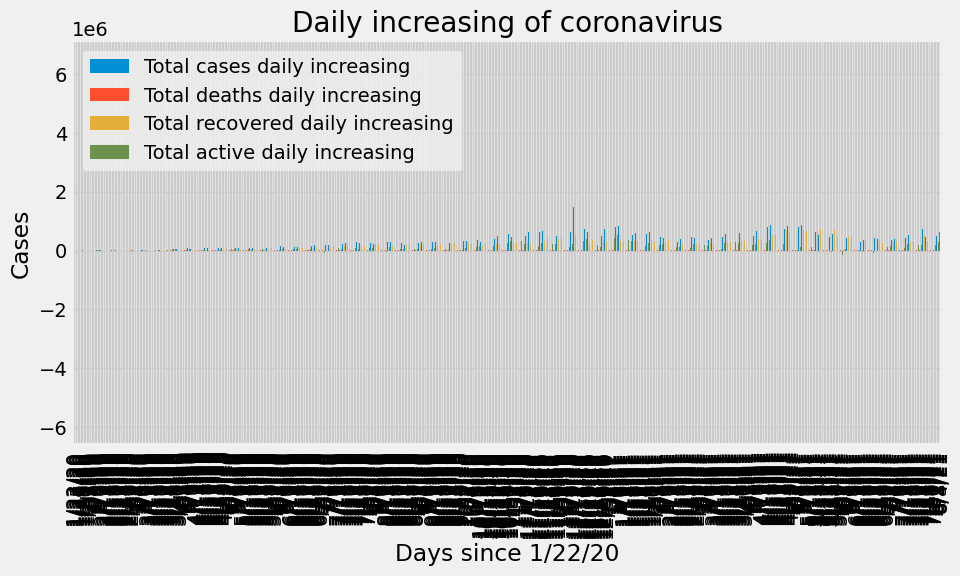

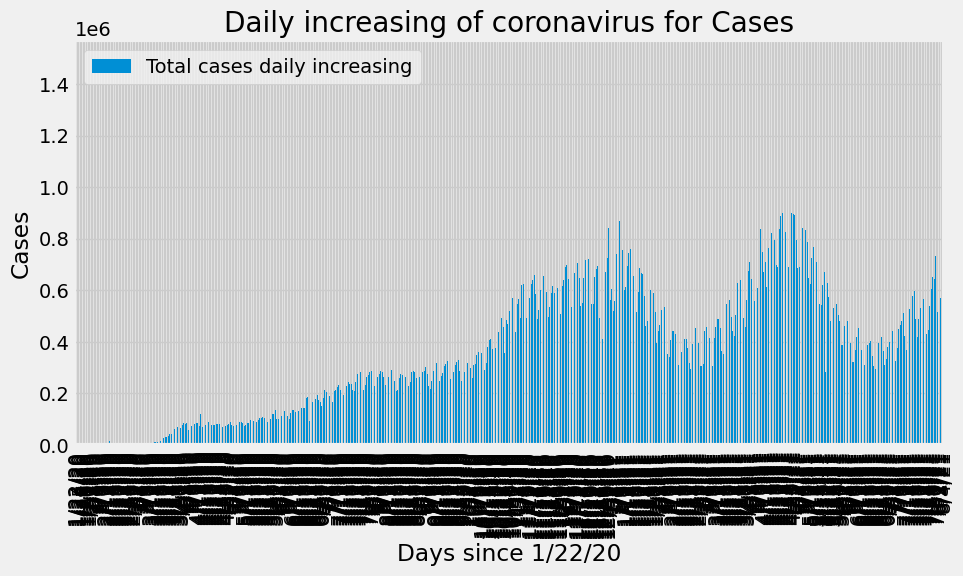

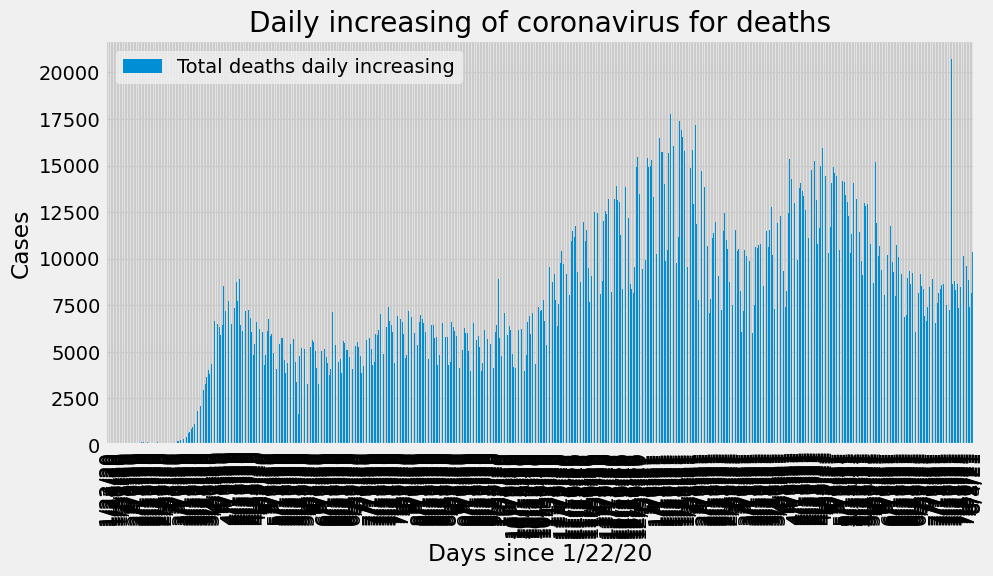

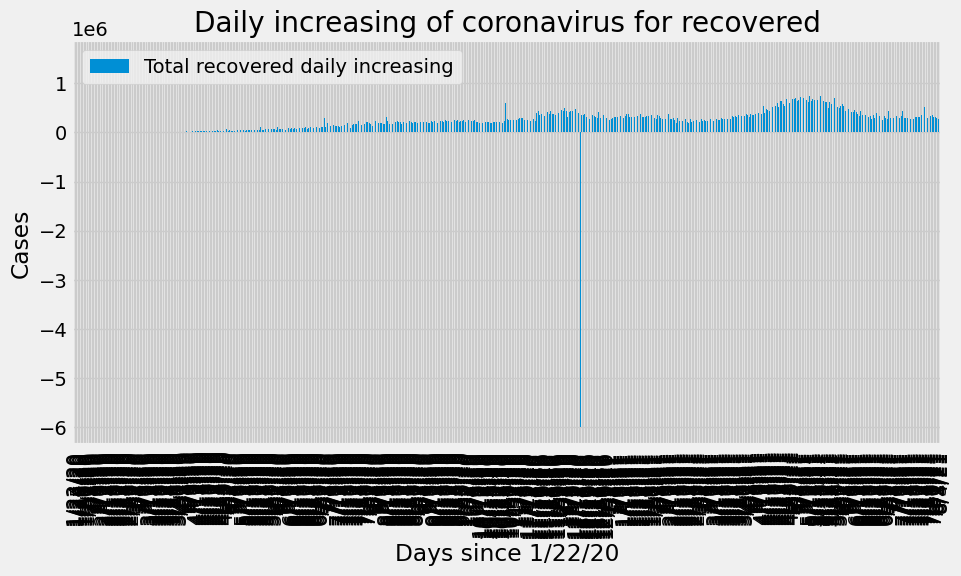

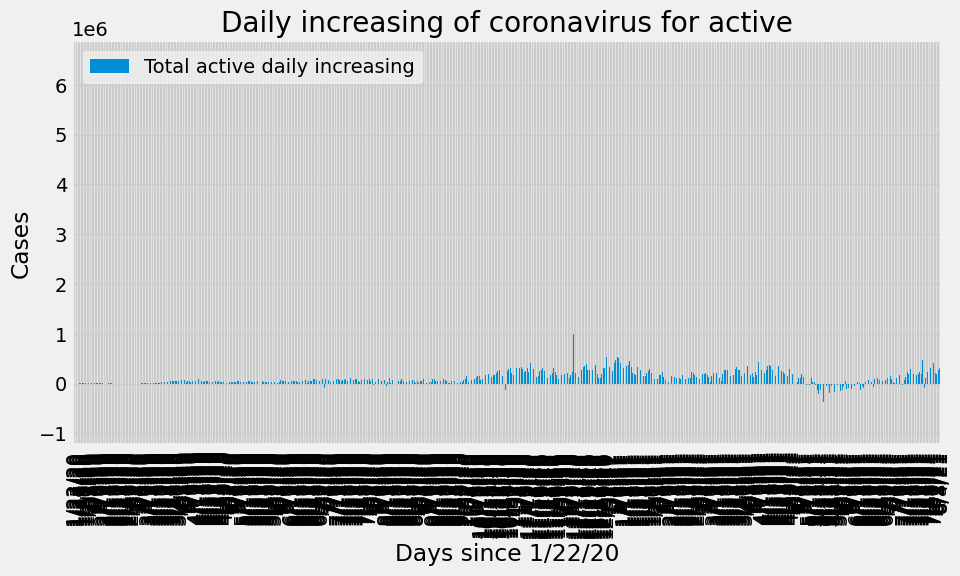

In [10]:
#Nhập mã lập trình của bạn tại đây:

dict_daily_incr={"Date":dates, 'Total cases daily increasing':total_cases_daily_incr, 'Total deaths daily increasing':total_deaths_daily_incr, 
      'Total recovered daily increasing':total_recovered_daily_incr, 'Total active daily increasing':total_active_daily_incr}
df_daily_incr=pd.DataFrame(dict_daily_incr)
df_daily_incr.set_index('Date', inplace=True)
df_daily_incr.plot(kind='bar', figsize=(10,5))
plt.title('Daily increasing of coronavirus')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Cases')
plt.legend(loc='upper left', fontsize='medium')
plt.show()

df_daily_incr_cases=df_daily_incr['Total cases daily increasing']
df_daily_incr_cases.plot(kind='bar', figsize=(10,5))
plt.title('Daily increasing of coronavirus for Cases')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Cases')
plt.legend(loc='upper left', fontsize='medium')
plt.show()

df_daily_incr_deaths=df_daily_incr['Total deaths daily increasing']
df_daily_incr_deaths.plot(kind='bar', figsize=(10,5))
plt.title('Daily increasing of coronavirus for deaths')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Cases')
plt.legend(loc='upper left', fontsize='medium')
plt.show()

df_daily_incr_recovered=df_daily_incr['Total recovered daily increasing']
df_daily_incr_recovered.plot(kind='bar', figsize=(10,5))
plt.title('Daily increasing of coronavirus for recovered')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Cases')
plt.legend(loc='upper left', fontsize='medium')
plt.show()

df_daily_incr_active=df_daily_incr['Total active daily increasing']
df_daily_incr_active.plot(kind='bar', figsize=(10,5))
plt.title('Daily increasing of coronavirus for active')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Cases')
plt.legend(loc='upper left', fontsize='medium')
plt.show()


# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [30]:
#Nhập mã lập trình của bạn tại đây:
# đã tính ở Bài toán 1:

print(mortality_rate)
print(recovery_rate)


[3.1, 2.7, 2.8, 2.9, 2.6, 2.8, 2.3, 2.2, 2.1, 2.2, 2.2, 2.2, 2.2, 2.1, 2.0, 2.1, 2.1, 2.2, 2.3, 2.4, 2.5, 2.5, 2.3, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 3.0, 2.9, 3.1, 3.1, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.6, 3.7, 3.7, 3.7, 3.7, 3.9, 4.0, 4.1, 4.2, 4.2, 4.3, 4.5, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.6, 5.8, 5.9, 6.2, 6.3, 6.4, 6.7, 6.8, 7.0, 7.1, 7.2, 7.1, 7.1, 7.2, 7.4, 7.4, 7.5, 7.5, 7.5, 7.6, 7.6, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.7, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.5, 7.5, 7.5, 7.4, 7.4, 7.4, 7.4, 7.3, 7.3, 7.2, 7.2, 7.1, 7.1, 7.1, 7.0, 7.0, 6.9, 6.8, 6.8, 6.8, 6.7, 6.6, 6.6, 6.5, 6.5, 6.5, 6.4, 6.4, 6.3, 6.2, 6.2, 6.2, 6.1, 6.1, 6.1, 6.0, 6.0, 5.9, 5.9, 5.9, 5.8, 5.8, 5.7, 5.7, 5.7, 5.6, 5.6, 5.5, 5.5, 5.4, 5.4, 5.3, 5.3, 5.2, 5.2, 5.1, 5.1, 5.0, 5.0, 5.0, 4.9, 4.9, 4.8, 4.8, 4.7, 4.7, 4.7, 4.6, 4.6, 4.6, 4.5, 4.5, 4.5, 4.4, 4.4, 4.4, 4.3, 4.3, 4.3, 4.3, 4.2, 4.2, 4.2, 4.1, 4.1, 4.1, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0,

# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

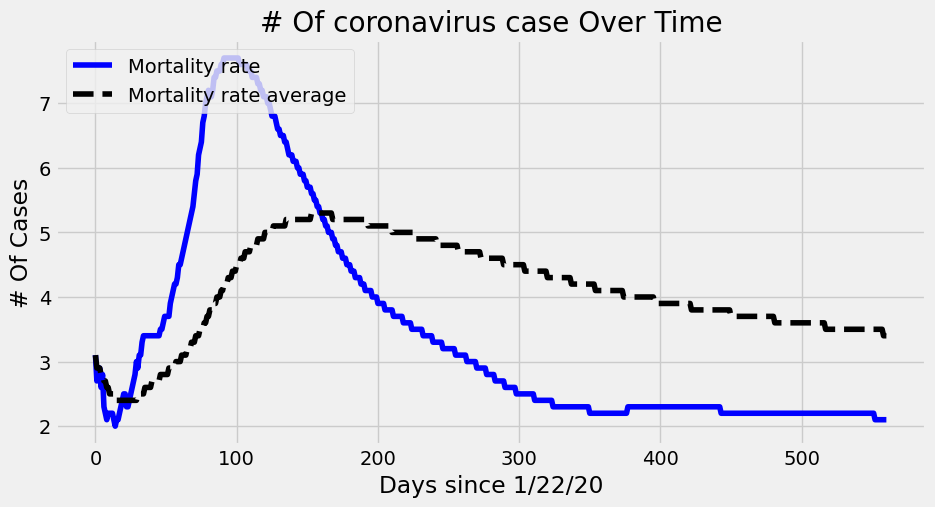

In [46]:
#Nhập mã lập trình của bạn tại đây:

mortality_rate_average=[]
import statistics
for i in range(len(mortality_rate)):
    mortality_rate_average.append(round((statistics.mean(mortality_rate[0:i+1])),1))
#print(mortality_rate)
#print(mortality_rate_average)

dict_mortality_rate={'Date':dates, 'Mortality rate':mortality_rate}
df_mortality_rate=pd.DataFrame(dict_mortality_rate)
ax0=df_mortality_rate.plot(kind='line', figsize=(10,5), color='blue')

dict_mortality_rate_average={'Date':dates, 'Mortality rate average':mortality_rate_average}
df_mortality_rate_average=pd.DataFrame(dict_mortality_rate_average)
ax1=df_mortality_rate_average.plot(kind='line', figsize=(10,5), linestyle='dashed', color='black', ax=ax0)

ax0.set_title('# Of coronavirus case Over Time')
ax0.set_xlabel('Days since 1/22/20')
ax0.set_ylabel('# Of Cases')
ax0.legend(['Mortality rate','Mortality rate average'],loc='upper left', fontsize='medium')


**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

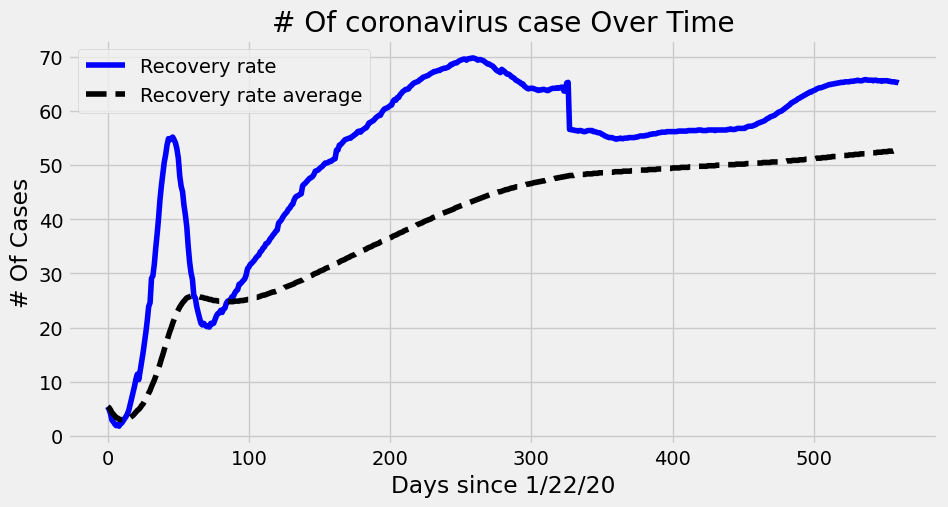

In [47]:
#Nhập mã lập trình của bạn tại đây:

recovery_rate_average=[]
import statistics
for i in range(len(recovery_rate)):
    recovery_rate_average.append(round((statistics.mean(recovery_rate[0:i+1])),1))
#print(recovery_rate)
#print(recovery_rate_average)

dict_recovery_rate={'Date':dates, 'Recovery rate':recovery_rate}
df_recovery_rate=pd.DataFrame(dict_recovery_rate)
ax0=df_recovery_rate.plot(kind='line', figsize=(10,5), color='blue')

dict_recovery_rate_average={'Date':dates, 'Recovery rate average':recovery_rate_average}
df_recovery_rate_average=pd.DataFrame(dict_recovery_rate_average)
ax1=df_recovery_rate_average.plot(kind='line', figsize=(10,5), linestyle='dashed', color='black', ax=ax0)

ax0.set_title('# Of coronavirus case Over Time')
ax0.set_xlabel('Days since 1/22/20')
ax0.set_ylabel('# Of Cases')
ax0.legend(['Recovery rate','Recovery rate average'],loc='upper left', fontsize='medium')


#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [9]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):      # using pycountry's tools: import pycountry_convert as pc
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


print(country_to_continent_code('France'))


EU


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [10]:
#Nhập mã lập trình của bạn tại đây:

continent1=[]
for i in confirmed_df['Country/Region']:
    continent1.append(continents[country_to_continent_code(i)])   # dict['key']: tìm value của dict - 'continents' là dict
#print(continent1)   
confirmed_df['continent']=continent1            # đưa list 'continent1' thành cột 'continent' của df 'confirmed_df'
b=['Province/State','Country/Region','continent']
confirmed_df=confirmed_df.reindex(columns=b+list([a for a in confirmed_df.columns if a not in b]))
print('Result for confirmed_df:')
print(confirmed_df.head())

continent2=[]
for i in deaths_df['Country/Region']:
    continent2.append(continents[country_to_continent_code(i)])   
deaths_df['continent']=continent2          
b=['Province/State','Country/Region','continent']
deaths_df=deaths_df.reindex(columns=b+list([a for a in deaths_df.columns if a not in b]))
print('Result for deaths_df:')
print(deaths_df.head())

continent3=[]
for i in recoveries_df['Country/Region']:
    continent3.append(continents[country_to_continent_code(i)])   
recoveries_df['continent']=continent3          
b=['Province/State','Country/Region','continent']
recoveries_df=recoveries_df.reindex(columns=b+list([a for a in recoveries_df.columns if a not in b]))
print('Result for recoveries_df:')
print(recoveries_df.head())


Result for confirmed_df:
  Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [11]:
#Nhập mã lập trình của bạn tại đây:
dict5={'Country/Region':confirmed_df['Country/Region'], 'continent':confirmed_df['continent'], 
       'Confirmed':confirmed_df['8/4/21'], 'Deaths':deaths_df['8/4/21'], 'Recoveries':recoveries_df['8/4/21'],
      'Active':confirmed_df['8/4/21'] - deaths_df['8/4/21'] - recoveries_df['8/4/21'],
      'Mortality rate':round(deaths_df['8/4/21']/confirmed_df['8/4/21']*100,2)}
df_total1=pd.DataFrame(dict5)
df_total1.set_index('Country/Region',inplace=True)
df_total1.head()


,continent,Confirmed,Deaths,Recoveries,Active,Mortality rate
Country/Region,,,,,,
Afghanistan,Asia,148933,6836,82586.0,59511.0,4.59
Albania,Europe,133310,2457,130314.0,539.0,1.84
Algeria,Africa,176724,4404,118409.0,53911.0,2.49
Andorra,Europe,14797,128,14380.0,289.0,0.87
Angola,Africa,43158,1026,39582.0,2550.0,2.38


# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [12]:
#Nhập mã lập trình của bạn tại đây:

df1=confirmed_df.groupby('continent')['8/4/21'].sum()
df2=deaths_df.groupby('continent')['8/4/21'].sum()
df3=recoveries_df.groupby('continent')['8/4/21'].sum()
df_total2=pd.concat([df1,df2,df3],axis=1)
df_total2.columns=['Confirmed','Deaths','Recoveries']        # đổi tên các cột của df
df_total2['Active']=df_total2['Confirmed'] - df_total2['Deaths'] - df_total2['Recoveries']
df_total2['Mortality rate']=round(df_total2['Deaths']/df_total2['Confirmed']*100,2)
df_total2


,Confirmed,Deaths,Recoveries,Active,Mortality rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902952,57853343,3780431,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167140,27947075,23334330,2.23
North America,42351963,924518,5776939,35650506,2.18
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [40]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = {"linewidth":3, "linestyle":'-', "marker":'o',"markersize":4, "markerfacecolor":'#ffffff'}
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox={"facecolor":'white', "alpha":0.4})

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

continent
Asia                      Asia
Europe                  Europe
North America    North America
South America    South America
Africa                  Africa
Others                  Others
Australia            Australia
Name: continent, dtype: object


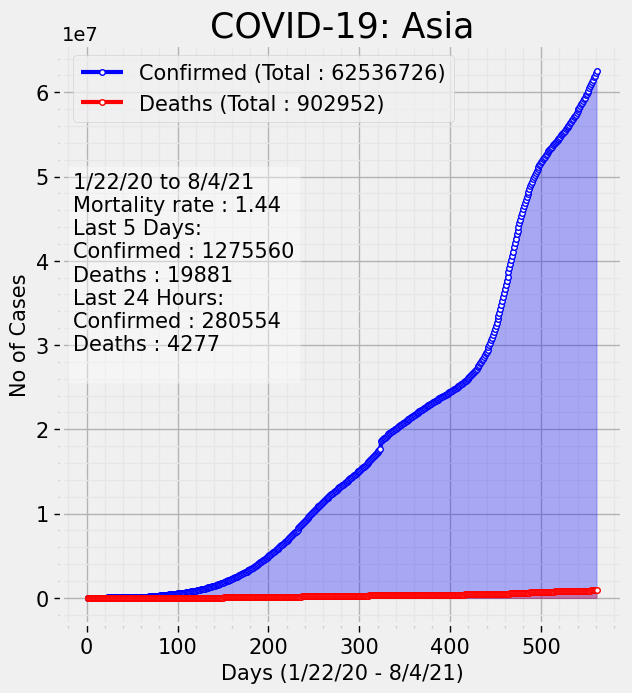

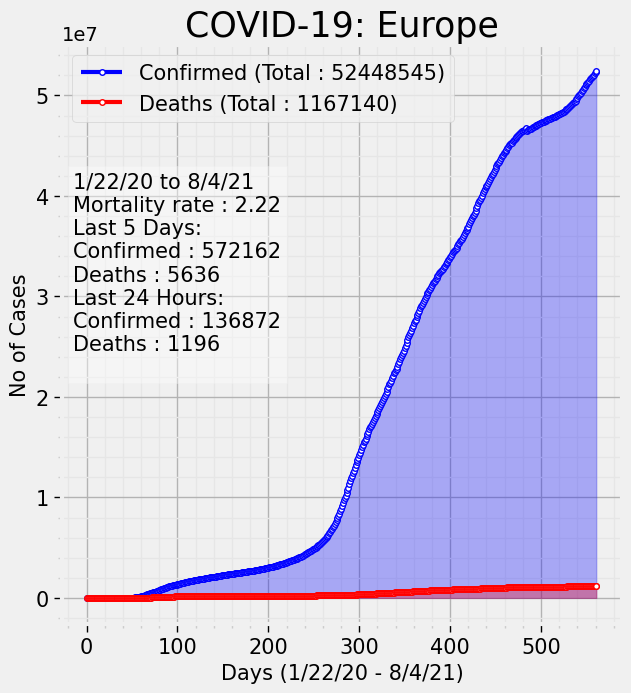

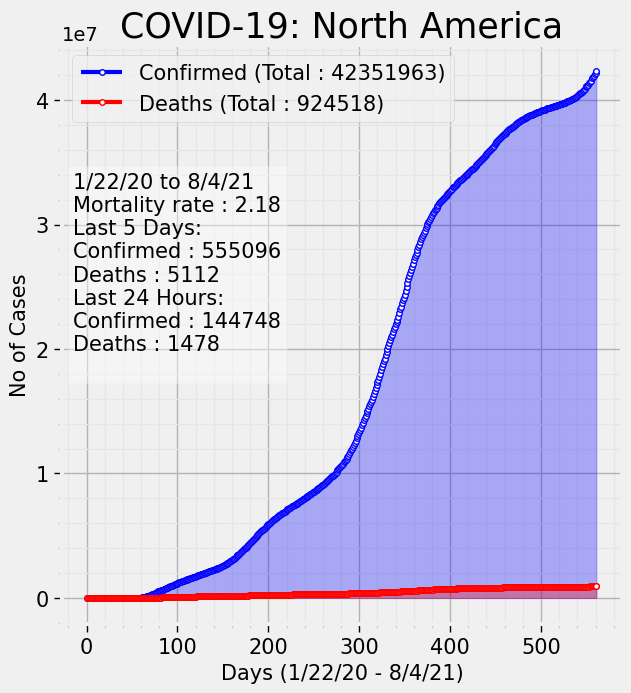

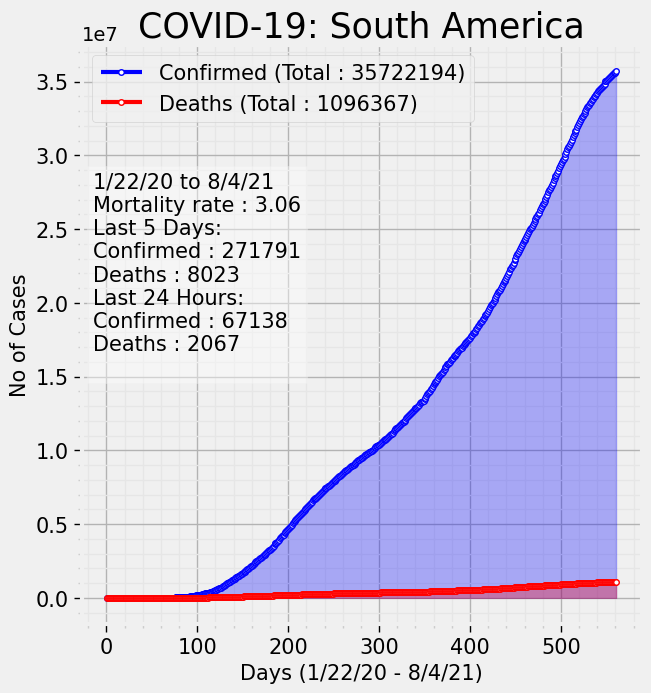

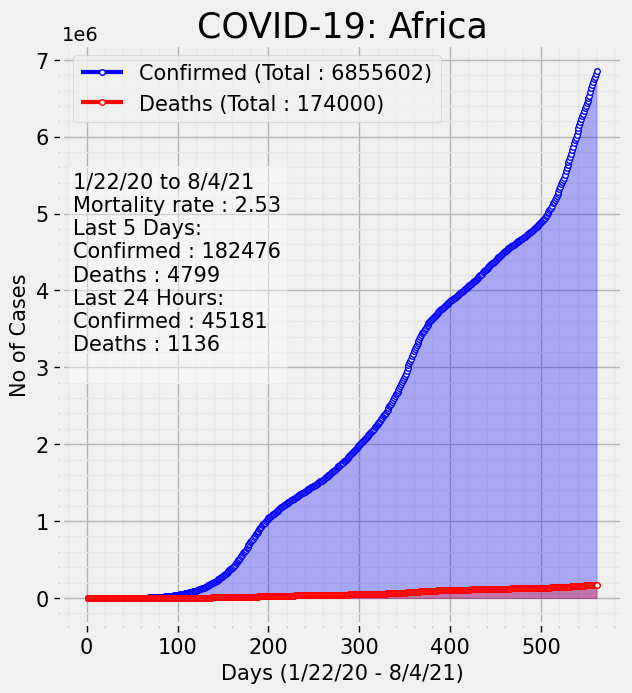

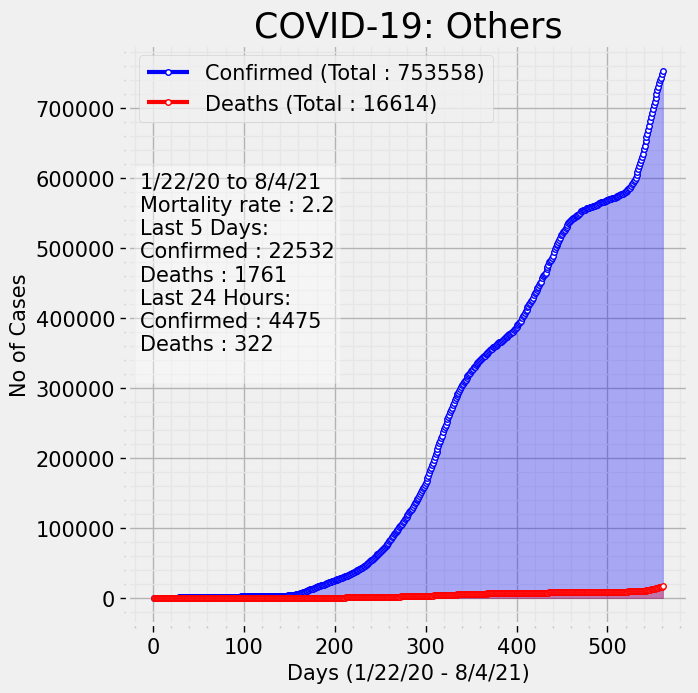

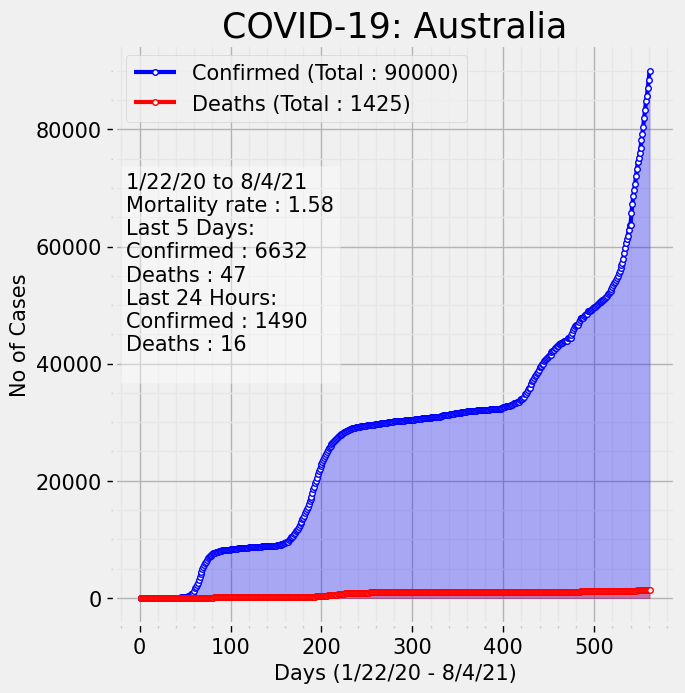

In [41]:
#Nhập mã lập trình của bạn tại đây:

df_total3=df_total2.sort_values('Confirmed',ascending=False)
#df_total2.sort_values('Confirmed',ascending=False)
#print(df_total3)
#print(df_total3.index.values)
print(df_total3.index.to_series())
#print(confirmed_df.head())
#deaths_df.head()

for index in df_total3.index.to_series():
    visualize_covid_cases(confirmed_df, deaths_df, index)
    #plt.show()



**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [48]:
#Nhập mã lập trình của bạn tại đây:

def visualize_covid_cases2(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = {"linewidth":3, "linestyle":'-', "marker":'o',"markersize":4, "markerfacecolor":'#ffffff'}
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:, 5:]), axis=0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Deaths : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox={"facecolor":'white', "alpha":0.4})

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



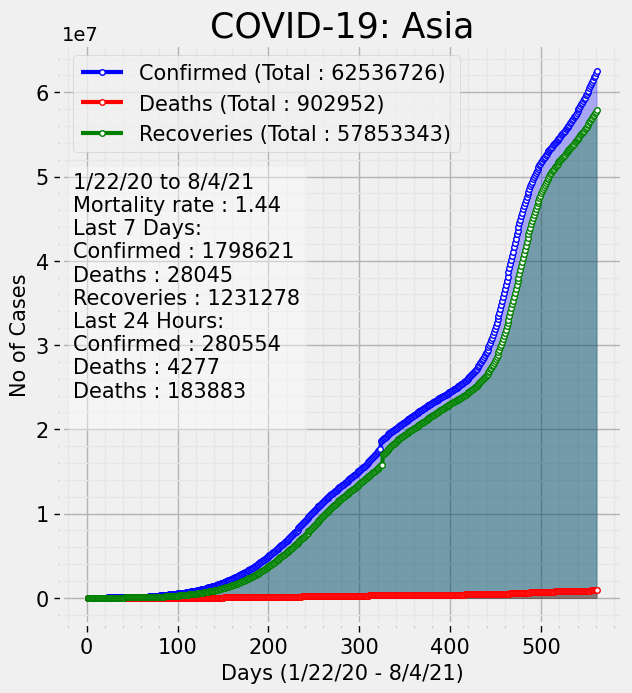

In [49]:
visualize_covid_cases2(confirmed_df, deaths_df, recoveries_df, 'Asia')


# Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

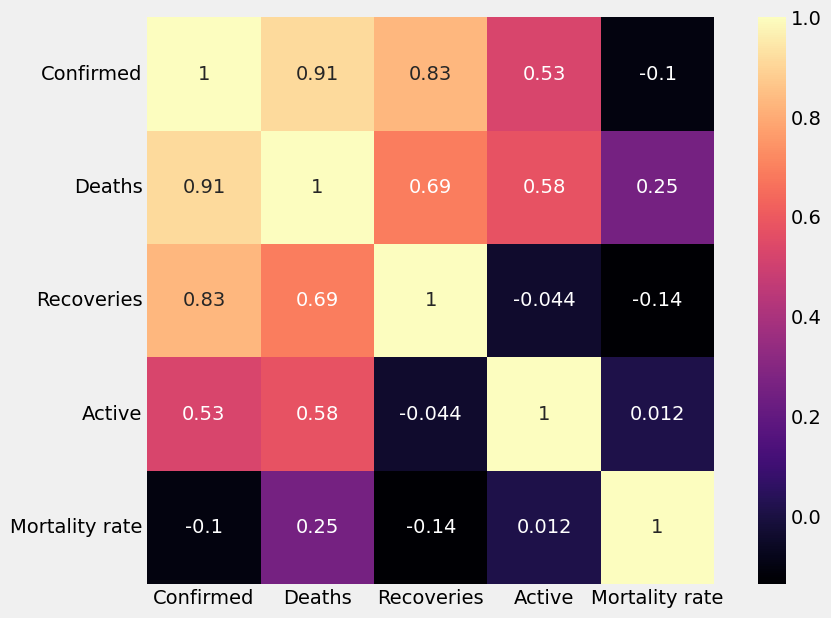

In [45]:
#Nhập mã lập trình của bạn tại đây:

#biểu đồ waffle, lab 10.2

plt.figure(figsize=(10, 7))
sns.heatmap(df_total3.corr(), annot=True, cmap='magma', square=True)
plt.yticks(rotation=0)
plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

               Confirmed   Deaths  Recoveries    Active  Mortality rate
continent                                                              
Asia            62536726   902952    57853343   3780431            1.44
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
South America   35722194  1096367    32656668   1969159            3.07
Africa           6855602   174000     5955131    726471            2.54
Others            753558    16614      654615     82329            2.20
Australia          90000     1425       55290     33285            1.58
['Confirmed' 'Deaths' 'Recoveries' 'Active']


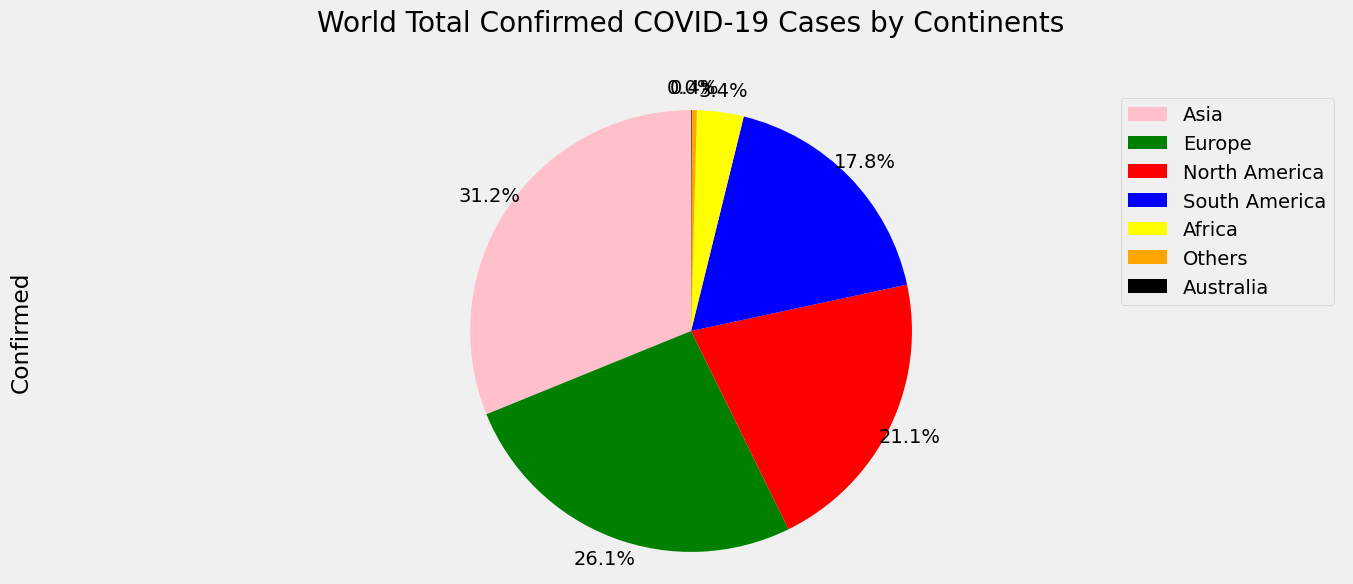

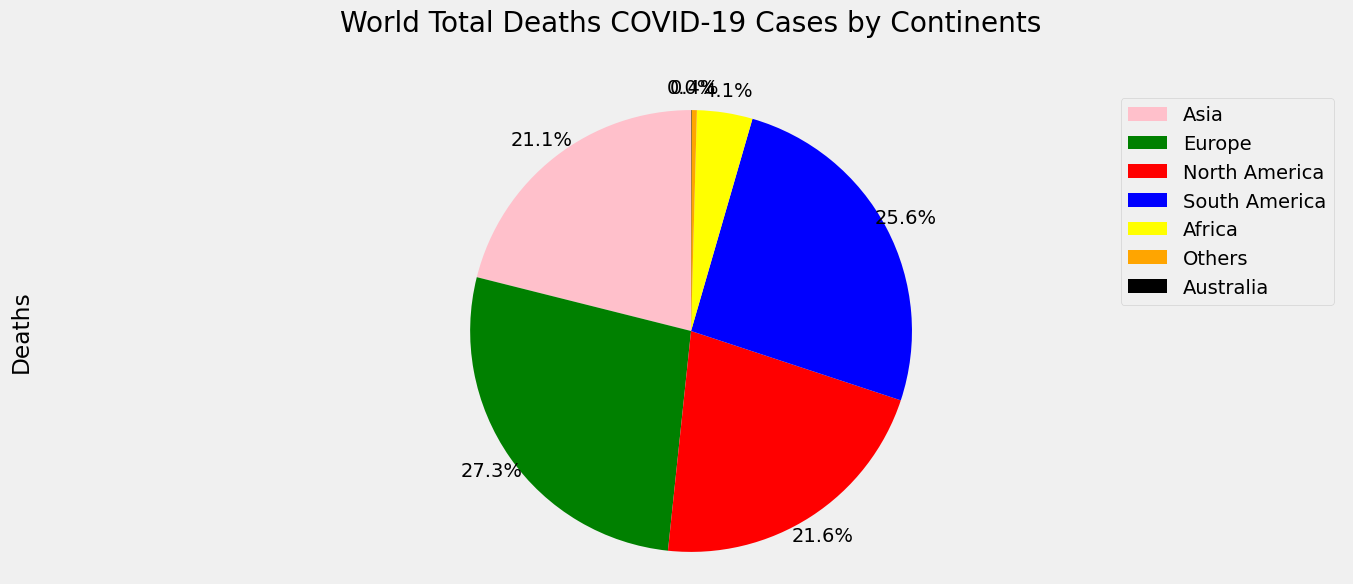

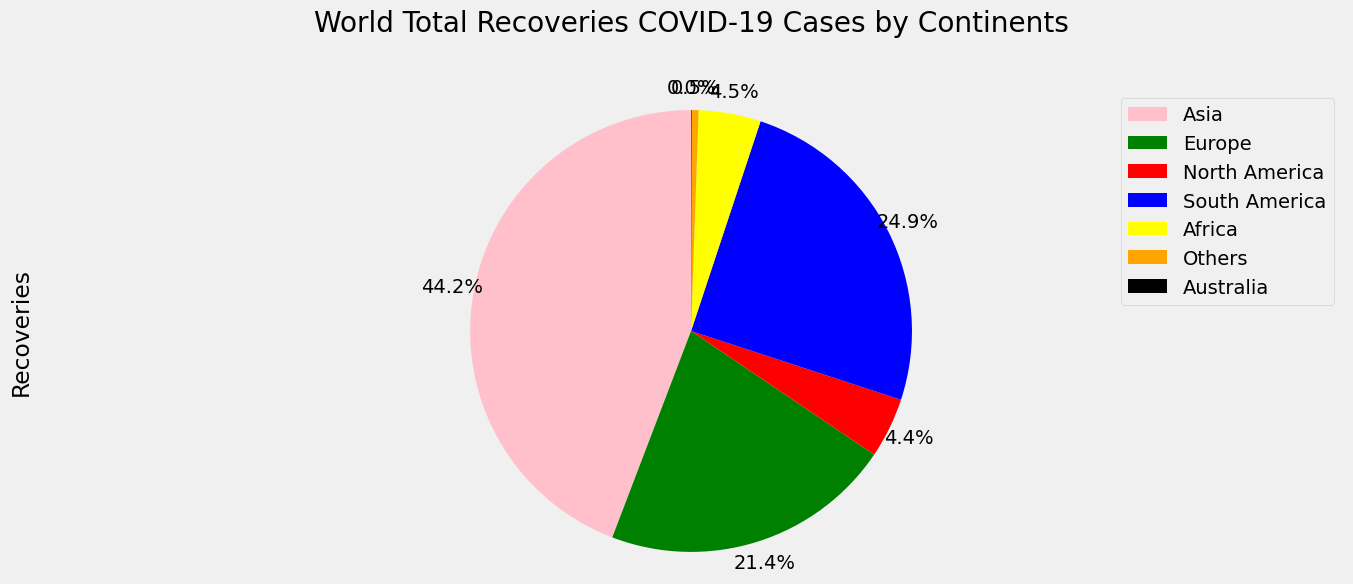

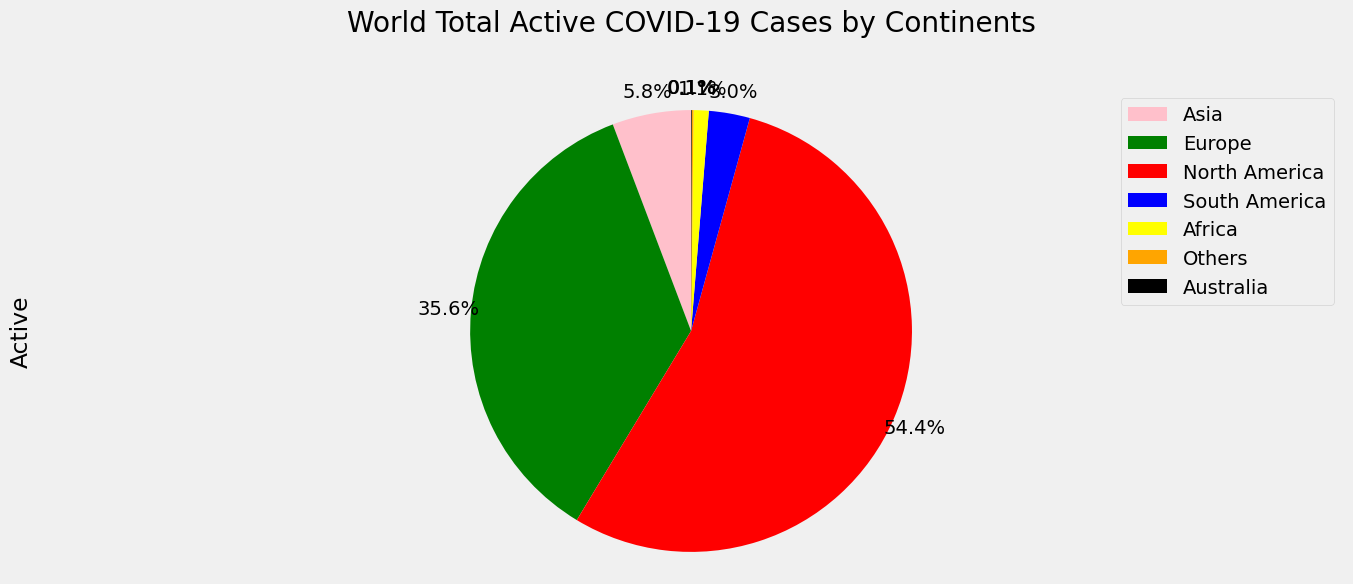

In [16]:
#Nhập mã lập trình của bạn tại đây:

print(df_total3)
col1=df_total3.columns.values
col1=np.delete(col1,4)
print(col1)
color = ['Pink','green','red','blue','yellow','orange','black']
for i in col1:
    df_total3[i].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90,
                           shadow=False, labels=None, pctdistance=1.1, colors=color)
    plt.title('World Total '+str(i)+' COVID-19 Cases by Continents', y=1.1)
    plt.axis('equal')
    plt.legend(labels=df_total3.index, loc='upper right')
    plt.show()
    

In [82]:
#Nhập mã lập trình của bạn tại đây:
#confirmed_df[confirmed_df['Long']=='NaN']
#confirmed_df[confirmed_df['Lat']=='NaN']

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [17]:
#Nhập mã lập trình của bạn tại đây:

# Tạo world_map
import folium
world_map=folium.Map()

# Tạo df 
df_total1.head()
df_total4=df_total1.drop(df_total1[['continent','Active']], axis=1)
Lat=list(confirmed_df['Lat'])
Long=list(confirmed_df['Long'])
df_total4['Lat']=Lat
df_total4['Long']=Long
df_total4=df_total4.dropna()    # xóa tất cả các dòng có giá trị trống NaN
#print(df_total4)

# Lập trình biểu đồ
Marker=folium.map.FeatureGroup()
for lat, lng, label in zip(df_total4.Lat, df_total4.Long, df_total4.Confirmed):
    Marker.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',       # màu viền bao quanh hình tròn ở 'fill_color'
            fill=True,
            fill_color='green',   # màu của hình tròn bên trong 'color'
            fill_opacity=0.6))
world_map.add_child(Marker)

from folium import plugins
Marker = plugins.MarkerCluster().add_to(world_map)
for lat, lng, label in zip(df_total4.Lat, df_total4.Long, df_total4.Confirmed):
    folium.Marker(
        [lat, lng],
        icon=None,
        popup=label,
    ).add_to(Marker)

world_map


# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [66]:

from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [18]:
#Nhập mã lập trình của bạn tại đây:

world_geo = r'world_countries.json' # geojson file
world_map = folium.Map(location=[0, 0], zoom_start=2)
country_active = df_total1[['Active']]
country_active=country_active[country_active['Active']>0]
#print(country_active)
log_active = np.log10(country_active)
log_active.reset_index(inplace=True)
world_map.choropleth(
    geo_data=world_geo,
    data=log_active,
    columns=['Country/Region', 'Active'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map


C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\folium\folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [17]:
#Nhập mã lập trình của bạn tại đây:

df_total_top10=df_total4.sort_values('Confirmed', ascending=False)
df_total_top10['Active']=df_total_top10['Confirmed']-df_total_top10['Deaths']-df_total_top10['Recoveries']
df_total_top10=df_total_top10.head(10)
df_total_top10

,Confirmed,Deaths,Recoveries,Mortality rate,Lat,Long,Active
Country/Region,,,,,,,
USA,35460776,611222,0.0,1.72,40.000000,-100.000000,34849554.0
India,31812114,426290,105688.0,1.34,20.593684,78.962880,31280136.0
Brazil,20034407,559944,17771228.0,2.79,-14.235000,-51.925300,1703235.0
Russia,6274006,159032,253972.0,2.53,61.524010,105.318756,5861002.0
France,6111503,110972,749773.0,1.82,46.227600,2.213700,5250758.0
United Kingdom,5952756,156911,NaN,2.64,55.378100,-3.436000,NaN
Turkey,5822487,51767,0.0,0.89,38.963700,35.243300,5770720.0
Argentina,4975616,106747,4615834.0,2.15,-38.416100,-63.616700,253035.0
Colombia,4815063,121695,209.0,2.53,4.570900,-74.297300,4693159.0


# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

                    Active  Recoveries  Deaths
Country/Region                                
USA             34849554.0         0.0  611222
India           31280136.0    105688.0  426290
Brazil           1703235.0  17771228.0  559944
Russia           5861002.0    253972.0  159032
France           5250758.0    749773.0  110972
United Kingdom         NaN         NaN  156911
Turkey           5770720.0         0.0   51767
Argentina         253035.0   4615834.0  106747
Colombia         4693159.0       209.0  121695
Spain            4430886.0     32454.0   81844


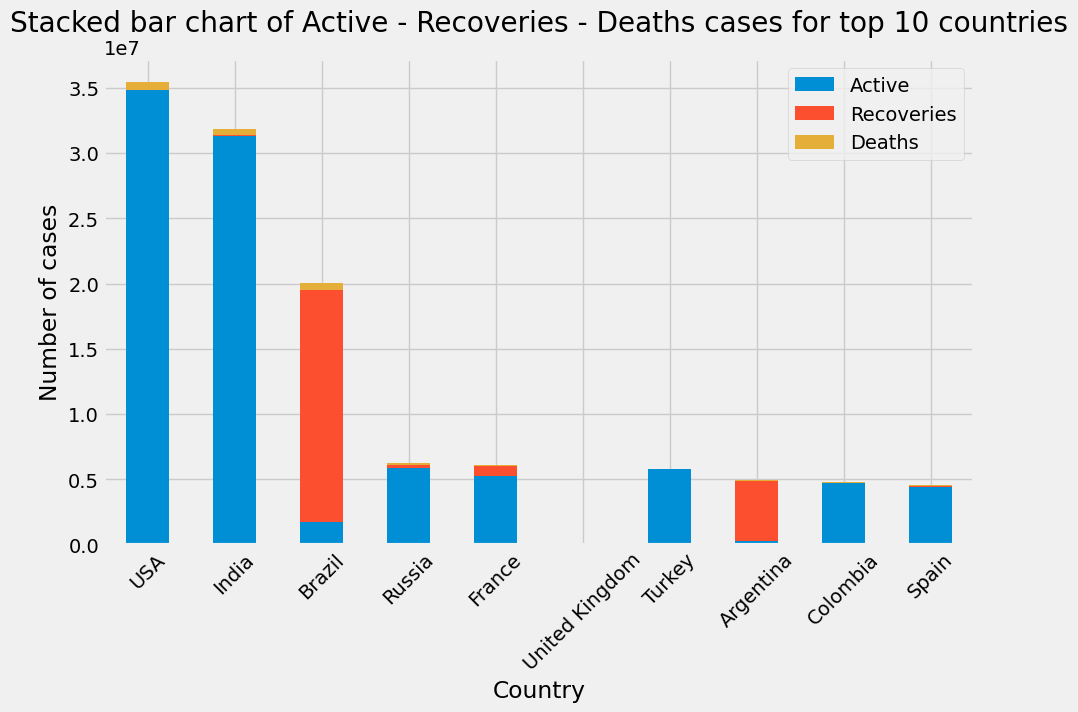

In [18]:
#Nhập mã lập trình của bạn tại đây:

df_total_top10_hist=df_total_top10[['Active','Recoveries','Deaths']]
df_total_top10_hist.reset_index()
print(df_total_top10_hist)
df_total_top10_hist.plot(kind='bar', stacked=True, figsize=(10,6), rot=45) 
plt.title('Stacked bar chart of Active - Recoveries - Deaths cases for top 10 countries')
plt.ylabel('Number of cases')
plt.xlabel('Country')
plt.show()



# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

In [87]:
#Dựa vào biểu đồ '# Of coronavirus case Over Time', nhận thấy thế giới đang hứng chịu làn sóng dịch Covid thứ 3 
#và chưa có chiều hướng thuyên giảm. Vì vậy, tính đến ngày 04/8/2021, dịch Covid-19 trên thế giới vẫn chưa đạt đến đỉnh điểm.


# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


In [19]:

df_total2['Recovery rate']=round(df_total2['Recoveries']/df_total2['Confirmed']*100,2)
continent_confirmed = confirmed_df.groupby('continent').sum()
df_total2['Spread rate']=round((continent_confirmed.iloc[:,-1]-continent_confirmed.iloc[:,-11])/continent_confirmed.iloc[:,-11]*100,2)
#print(df_total2)
print('------> Châu lục có tỷ lệ tử vong cao nhất là:',df_total2['Mortality rate'].idxmax())
print(df_total2.sort_values('Mortality rate',ascending=False).head(1))
print('------> Châu lục có tỷ lệ lây lan COVID 2019 cao nhất là:',df_total2['Spread rate'].idxmax())
print(df_total2.sort_values('Spread rate',ascending=False).head(1))
print('-----> Châu lục có tỷ lệ khỏi bệnh cao nhất là:',df_total2['Recovery rate'].idxmax())
print(df_total2.sort_values('Recovery rate',ascending=False).head(1))


------> Châu lục có tỷ lệ tử vong cao nhất là: South America
               Confirmed   Deaths  Recoveries   Active  Mortality rate  \
continent                                                                
South America   35722194  1096367    32656668  1969159            3.07   

               Recovery rate  Spread rate  
continent                                  
South America          91.42         1.75  
------> Châu lục có tỷ lệ lây lan COVID 2019 cao nhất là: Australia
           Confirmed  Deaths  Recoveries  Active  Mortality rate  \
continent                                                          
Australia      90000    1425       55290   33285            1.58   

           Recovery rate  Spread rate  
continent                              
Australia          61.43        17.25  
-----> Châu lục có tỷ lệ khỏi bệnh cao nhất là: Asia
           Confirmed  Deaths  Recoveries   Active  Mortality rate  \
continent                                                           


# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [20]:

df_total1['Recovery rate']=round(df_total1['Recoveries']/df_total1['Confirmed']*100,2)
country_confirmed = confirmed_df.groupby('Country/Region').sum()
df_total1['Spread rate']=round((country_confirmed.iloc[:,-1]-country_confirmed.iloc[:,-11])/country_confirmed.iloc[:,-11]*100,2)
df_total7=df_total1[(df_total1['Recoveries']>0) & (df_total1['Active']>0)]    # lọc theo giá trị cột, có () giữa các ĐK
#print(df_total7)
print('-----> Quốc gia có tỷ lệ tử vong cao nhất là:',df_total7['Mortality rate'].idxmax())
print(df_total7.sort_values('Mortality rate',ascending=False).head(1))
print('-----> Quốc gia có tỷ lệ lan truyền COVID 2019 cao nhất là:',df_total7['Spread rate'].idxmax())
print(df_total7.sort_values('Spread rate',ascending=False).head(1))
print('-----> Quốc gia có tỷ lệ khỏi bệnh cao nhất là:',df_total7['Recovery rate'].idxmax())
print(df_total7.sort_values('Recovery rate',ascending=False).head(1))


-----> Quốc gia có tỷ lệ tử vong cao nhất là: Peru
                    continent  Confirmed  Deaths  Recoveries     Active  \
Country/Region                                                            
Peru            South America    2119068  196673     48812.0  1873583.0   

                Mortality rate  Recovery rate  Spread rate  
Country/Region                                              
Peru                      9.28            2.3          0.7  
-----> Quốc gia có tỷ lệ lan truyền COVID 2019 cao nhất là: Fiji
                continent  Confirmed  Deaths  Recoveries   Active  \
Country/Region                                                      
Fiji            Australia      33920     272      7310.0  26338.0   

                Mortality rate  Recovery rate  Spread rate  
Country/Region                                              
Fiji                       0.8          21.55        46.59  
-----> Quốc gia có tỷ lệ khỏi bệnh cao nhất là: Bahrain
               continent  Co

# Bài toán 21
**Tập dữ liệu USA**

In [73]:

us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data.head()


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,16916.662680,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1250.876152,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975


Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [74]:
#Nhập mã lập trình của bạn tại đây:

us_medical_data['Active_Rate']=round(us_medical_data['Active']/us_medical_data['Confirmed']*100,2)
us_medical_data['Recovered_Rate']=round(us_medical_data['Recovered']/us_medical_data['Confirmed']*100,2)
us_medical_data=us_medical_data[(us_medical_data['Deaths']>0) & (us_medical_data['Recovered']>0) & (us_medical_data['Active']>0)]
#print(us_medical_data.head())
#us_medical_data.columns.values
us_top1_death=us_medical_data.sort_values('Mortality_Rate', ascending=False).head(1)
us_top1_active=us_medical_data.sort_values('Active_Rate', ascending=False).head(1)
us_top1_recovered=us_medical_data.sort_values('Recovered_Rate', ascending=False).head(1)

print('---> Tiểu bang có tỷ lệ tử vong cao nhất là: '+str(us_top1_death['Province_State'].values)+
      ' :'+str(us_top1_death['Mortality_Rate'].values)+'%')
print(us_top1_death)

print('---> Tiểu bang có tỷ lệ lan truyền Covid cao nhất là: '+str(us_top1_active['Province_State'].values)+
      ' :'+str(us_top1_active['Active_Rate'].values)+'%')
print(us_top1_active)

print('---> Tiểu bang có tỷ lệ khỏi bệnh cao nhất là: '+str(us_top1_recovered['Province_State'].values)+
      ' :'+str(us_top1_recovered['Recovered_Rate'].values)+'%')
print(us_top1_recovered)


---> Tiểu bang có tỷ lệ tử vong cao nhất là: ['Connecticut'] :[9.23450272]%
  Province_State Country_Region          Last_Update      Lat    Long_  \
7    Connecticut             US  2020-07-07 04:34:13  41.5978 -72.7554   

   Confirmed  Deaths  Recovered   Active  FIPS  ...  Case_Fatality_Ratio  \
7      46976    4338     8210.0  34428.0     9  ...                  NaN   

          UID  ISO3  Testing_Rate  Hospitalization_Rate        Date  \
7  84000009.0   USA  14707.483577             22.162381  2020-07-06   

   People_Tested  Mortality_Rate Active_Rate  Recovered_Rate  
7       524364.0        9.234503       73.29           17.48  

[1 rows x 23 columns]
---> Tiểu bang có tỷ lệ lan truyền Covid cao nhất là: ['Nevada'] :[94.42]%
   Province_State Country_Region          Last_Update      Lat     Long_  \
32         Nevada             US  2020-07-07 04:34:13  38.3135 -117.0554   

    Confirmed  Deaths  Recovered   Active  FIPS  ...  Case_Fatality_Ratio  \
32      22909     537    

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp được xác nhận mới trong 10 bang hàng đầu có số ca xác nhận dương tính cao nhất ở Hoa Kỳ.

In [ ]:
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang 
New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. 
Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và 
sử dụng dữ liệu của 4 bang York, Florida, Texas, California để làm bộ test cho mô hình

In [75]:
#Nhập mã lập trình của bạn tại đây:

us_medical_data.set_index('Province_State', inplace=True)
us_medical_data.fillna(0, inplace=True)

import sklearn
from sklearn import linear_model

#us_medical_data.info()      Dữ liệu có 58 dòng, tách ra 2 phần cho Train và Test

#Các thuộc tính dùng trong tập Train gồm: Incident_Rate, Testing_Rate, Mortality_Rate
train_df = us_medical_data.sort_values('Confirmed', ascending=False)
test_df = us_medical_data.sort_values('Confirmed', ascending=False)   # Test cho 4 bang
X_train = train_df[['Confirmed']]
X_test = test_df[['Confirmed']]
y_train = train_df['Deaths']
y_test = test_df['Deaths']
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
X_test['Predict_Deaths'] = np.round(y_predict)
X_test['Actual_Deaths'] = y_test
X_test.loc[['New York','Texas','Alaska','New Jersey']]


C:\Users\PC\AppData\Local\Temp\ipykernel_5412\504770992.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\AppData\Local\Temp\ipykernel_5412\504770992.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Confirmed,Predict_Deaths,Actual_Deaths
Province_State,,,
New York,397649,26762.0,32057
Texas,204710,13355.0,2891
Alaska,1184,-788.0,16
New Jersey,174766,11274.0,15229
